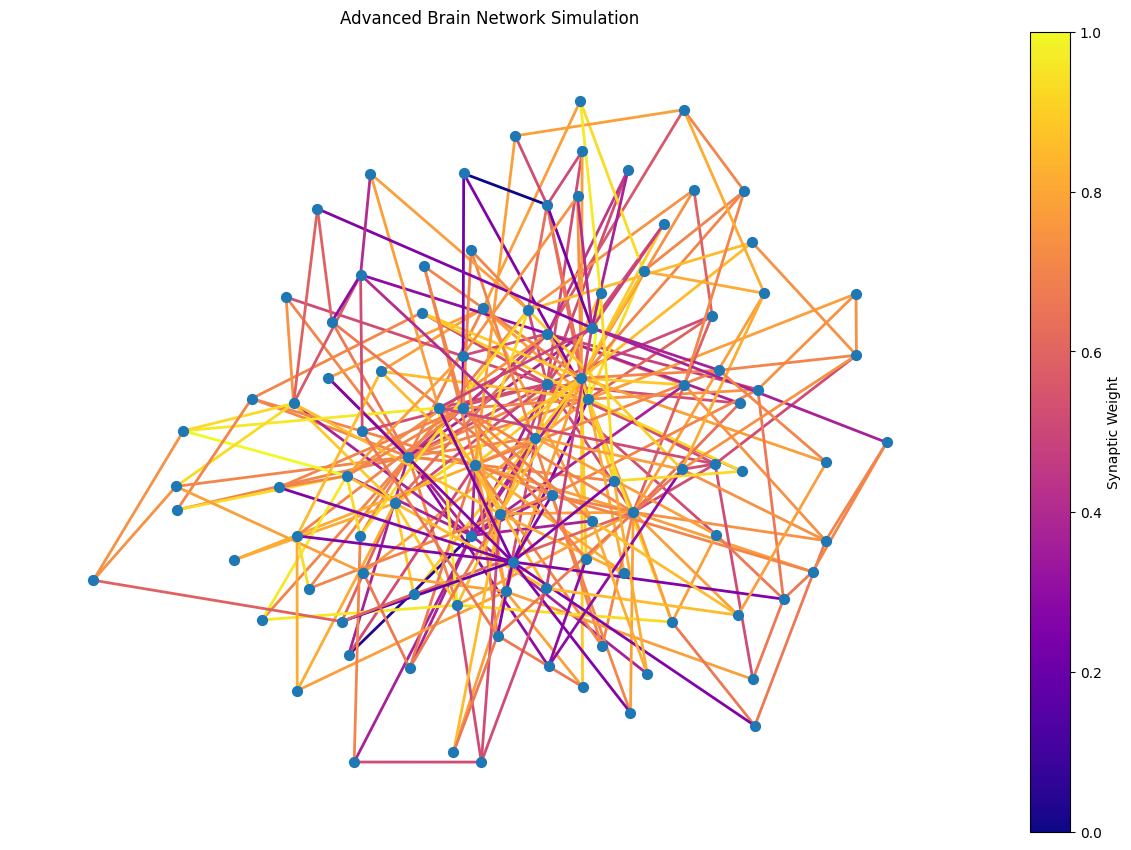

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Complex Network Topology - Scale-Free Network
network_size = 100
scale_free_network = nx.barabasi_albert_graph(network_size, 3)  # Scale-free network

# Step 2: Detailed Neuronal Dynamics
# Each node represents a neuron with distinct properties (e.g., threshold, potential)
neuron_properties = {
    node: {
        'threshold': np.random.uniform(0.5, 1.5),
        'potential': 0.0
    } for node in scale_free_network.nodes()
}

# Step 3: Synaptic Plasticity with Hebbian Learning Rules
def hebbian_learning(network, neuron_props):
    for u, v in network.edges():
        if neuron_props[u]['potential'] > neuron_props[u]['threshold'] and neuron_props[v]['potential'] > neuron_props[v]['threshold']:
            if 'weight' not in network[u][v]:
                network[u][v]['weight'] = 0.1  # Initialize weight
            network[u][v]['weight'] += 0.01  # Strengthen the connection

# Step 4: Time-Varying External Inputs
time_steps = 100
external_inputs = np.random.rand(network_size, time_steps) * 0.2

# Step 5: Network Perturbations and Analysis
def apply_perturbation(network, neuron_props):
    # Randomly select a neuron and reset its potential
    random_neuron = np.random.choice(list(network.nodes()))
    neuron_props[random_neuron]['potential'] = 0.0

# Simulating network dynamics over time
for t in range(time_steps):
    # Apply external stimulus
    for node in scale_free_network.nodes():
        neuron_properties[node]['potential'] += external_inputs[node, t]

    # Update network based on neuron potentials
    hebbian_learning(scale_free_network, neuron_properties)

    # Apply perturbations
    if t % 10 == 0:  # Apply perturbation every 10 time steps
        apply_perturbation(scale_free_network, neuron_properties)

# Step 6: Visualization
# Visualizing the network with edges colored by weight
edge_colors = [scale_free_network[u][v]['weight'] if 'weight' in scale_free_network[u][v] else 0.1 for u, v in scale_free_network.edges()]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(scale_free_network)
nx.draw(scale_free_network, pos, edge_color=edge_colors, width=2, edge_cmap=plt.cm.plasma, node_size=50, with_labels=False)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), ax=plt.gca(), label='Synaptic Weight')
plt.title("Advanced Brain Network Simulation")
plt.show()
